# Importing libraries

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Import data

In [5]:
df=pd.read_pickle(r'D:\Sonal\career foundry\CareerFoundry\Data Immersion\Achievement 4\Exc 4.10\Active_cust_new.pkl')

In [6]:
df.shape

(30171424, 40)

In [7]:
path='D:\Sonal\career foundry\CareerFoundry\Data Immersion\Achievement 4\Exc 4.3'

# Task 7

In [9]:
# Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

This analysis will provides insights into customer behavior patterns, showing the range and typical values of how often they use the service and how much they spend. It helps identify high-value customers, occasional users, and overall usage trends.

In [11]:
# Addressing the price column

In [12]:
df['prices'].describe()

count    3.017142e+07
mean     1.185801e+01
std      4.843390e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [13]:
df.loc[df['prices'] >100, 'prices'] = np.nan

In [14]:
df['prices'].max()

25.0

In [15]:
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,fam_status,income,_merge,region,activity_flag,age_group,income_group,day_group,Hour_group,Household size
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,married,49620,both,Midwest,high_activity_customers,Senior,Low Income,Weekday,Morning Shopper,Small
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,married,49620,both,Midwest,high_activity_customers,Senior,Low Income,Weekday,Evening Shopper,Small
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,...,married,57797,both,West,high_activity_customers,Mid Aged Adult,Mid Income,Weekend,Morning Shopper,Big
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,...,living with parents and siblings,34171,both,South,high_activity_customers,Single Adult,Low Income,Weekday,Afternoon Shopper,Big
7,1,Chocolate Sandwich Cookies,61,19,5.8,1290456,910,12,3,10,...,divorced/widowed,44856,both,South,high_activity_customers,Senior,Low Income,Weekday,Morning Shopper,Small


In [16]:
# Aggregation by age group

In [17]:
df.groupby('age_group').agg({'days_since_prior_order' : ['min', 'mean', 'max'], 
                                                                  'prices' : ['min', 'mean', 'max']})

days_since_prior_order                  prices                
                                  min       mean   max    min      mean   max
age_group                                                                    
Mid Aged Adult                    0.0  10.641588  30.0    1.0  7.788484  25.0
Senior                            0.0  10.626637  30.0    1.0  7.794923  25.0
Single Adult                      0.0  10.665940  30.0    1.0  7.780394  25.0
Young Parent                      0.0  10.608146  30.0    1.0  7.792569  25.0

This helps in understanding the shopping behavior and price sensitivity across different age groups.

In [19]:
# Aggregation by income group

In [20]:
df.groupby('income_group').agg({'days_since_prior_order' : ['min', 'mean', 'max'],
                                                                        'prices' : ['min', 'mean', 'max']})

days_since_prior_order                  prices                
                                min       mean   max    min      mean   max
income_group                                                               
High Income                     0.0  10.521101  30.0    1.0  7.937932  25.0
Low Income                      0.0  10.943485  30.0    1.0  6.711410  25.0
Mid Income                      0.0  10.608719  30.0    1.0  7.917255  25.0

 This helps in understanding the shopping behavior and price sensitivity across different income groups.

In [22]:
# Aggregation by Household size

In [23]:
df.groupby('Household size').agg({'days_since_prior_order' : ['min', 'mean', 'max'],
                                                                        'prices' : ['min', 'mean', 'max']})


days_since_prior_order                  prices                
                                  min       mean   max    min      mean   max
Household size                                                               
Big                               0.0  10.647296  30.0    1.0  7.787636  25.0
Small                             0.0  10.619849  30.0    1.0  7.792359  25.0

 This helps in understanding the shopping behavior and price sensitivity across different household sizes.

# Import department dataframe

In [26]:
df_dep=pd.read_csv(r'D:\Sonal\career foundry\CareerFoundry\Data Immersion\Achievement 4\Exc 4.3\Prepared data\departments_wrangled.csv',index_col=False)

In [27]:
df_dep

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [28]:
df_dep.rename(columns={'Unnamed: 0': 'department_id'}, inplace=True)

In [29]:
df_dep

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [30]:
df_dep.dtypes

department_id     int64
department       object
dtype: object

In [31]:
df_dep.shape

(21, 2)

# Merge the data

In [33]:
df_merged=df.merge(df_dep, on =['department_id'], indicator='merge_indicator')

In [34]:
# Creating crosstab for region and department

In [35]:
region_department=pd.crosstab(df_merged['region'], df_merged['department'], dropna=False)

In [36]:
region_department

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
region,,,,,,,,,,,,,,,,,,,,,
Midwest,32883,94027,255082,583228,151846,7806,230173,1182974,228200,187653,...,161733,58854,153688,15056,7737,408085,97357,20748,2080206,629156
Northeast,24114,71370,194076,451674,114701,5482,171517,892624,173837,139489,...,120839,43342,115204,11104,6060,303892,72593,17242,1554985,481100
South,47069,136961,362204,837788,217548,10953,327746,1682429,325082,264766,...,222964,82329,217724,21024,11273,575074,138415,28893,2955891,894880
West,35507,100708,281126,634551,169324,8600,252605,1295413,250931,205775,...,172759,64197,169113,15357,8345,445063,103442,23456,2268862,694215


In [37]:
region_department.T

region,Midwest,Northeast,South,West
department,,,,
alcohol,32883,24114,47069,35507
babies,94027,71370,136961,100708
bakery,255082,194076,362204,281126
beverages,583228,451674,837788,634551
breakfast,151846,114701,217548,169324
bulk,7806,5482,10953,8600
canned goods,230173,171517,327746,252605
dairy eggs,1182974,892624,1682429,1295413
deli,228200,173837,325082,250931


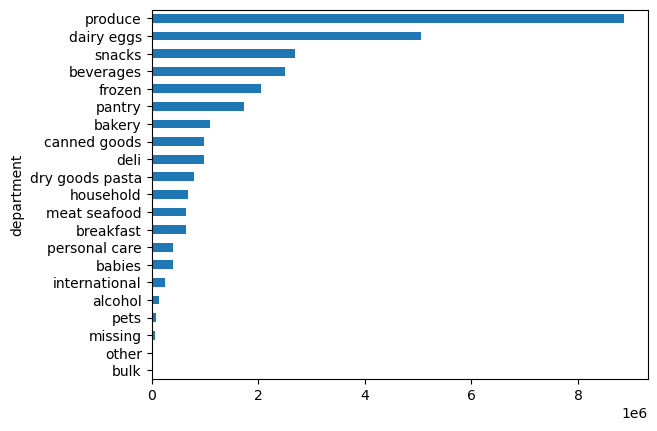

In [133]:
Bar =df_merged.department.value_counts().sort_values().plot(kind = 'barh')

In [137]:
Bar.figure.savefig(os.path.join(path, 'Analysis', 'viz', 'Bar_department.png'))

In [38]:
# Creating crosstab for region and age group

In [39]:
region_age=pd.crosstab(df_merged['region'], df_merged['age_group'], dropna=False)

In [40]:
region_age

age_group,Mid Aged Adult,Senior,Single Adult,Young Parent
region,,,,
Midwest,1578137,2388444,1424148,1679393
Northeast,1178477,1835060,1081643,1229171
South,2155548,3433960,2072383,2388268
West,1734565,2648321,1565234,1778672


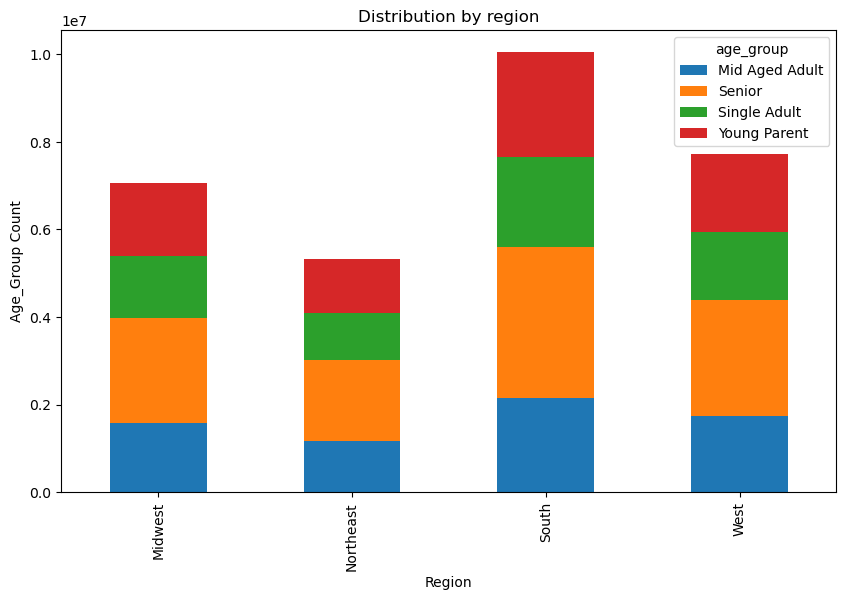

In [41]:
region_age.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution by region')
plt.xlabel('Region')
plt.ylabel('Age_Group Count')
plt.savefig(os.path.join(path, 'Analysis', 'viz', 'age_region.png'))

The chart provides a clear visual comparison of demographic patterns among U.S. regions, highlighting regional variations in age group distributions.

In [43]:
# Creating crosstab for region and income group

In [44]:
region_income=pd.crosstab(df_merged['region'],df_merged['income_group'],dropna=False)

In [45]:
region_income

income_group,High Income,Low Income,Mid Income
region,,,
Midwest,893843,756646,5419633
Northeast,662099,565708,4096544
South,1261587,1105766,7682806
West,985045,820714,5921033


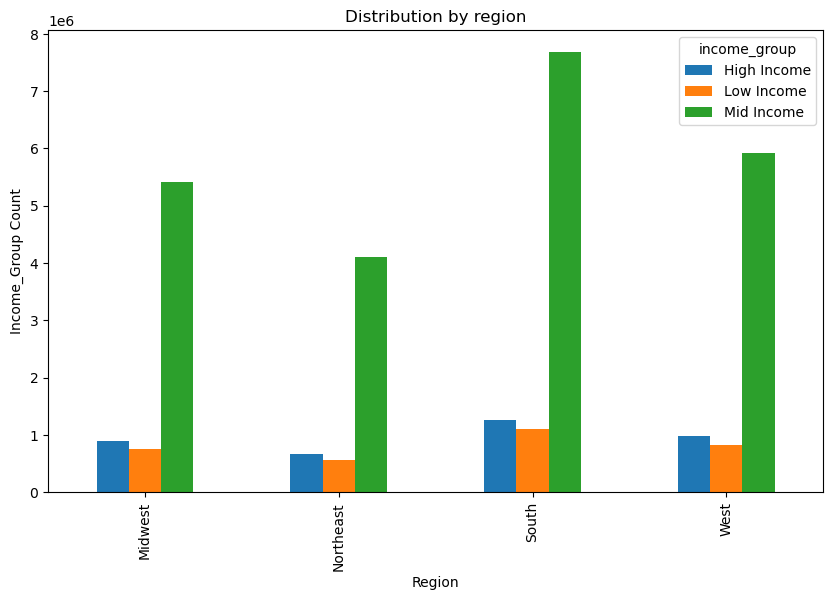

In [46]:
region_income.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution by region')
plt.xlabel('Region')
plt.ylabel('Income_Group Count')
plt.savefig(os.path.join(path, 'Analysis', 'viz', 'region_income.png'))

This visualization effectively illustrates regional economic disparities and the predominance of middle-income households across the United States.

In [48]:
# Creating crosstab for region and Household size

In [49]:
region_household_size = pd.crosstab(df_merged['region'], df_merged['Household size'], dropna=False)

In [50]:
region_household_size

Household size,Big,Small
region,,
Midwest,3500955,3569167
Northeast,2663773,2660578
South,5059128,4991031
West,3884712,3842080


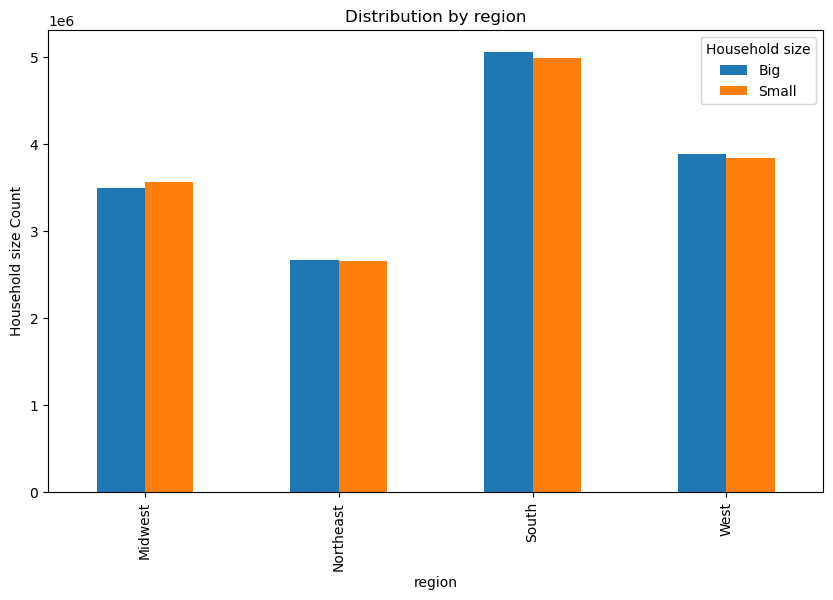

In [51]:
region_household_size.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution by region')
plt.xlabel('region')
plt.ylabel('Household size Count')
plt.savefig(os.path.join(path, 'Analysis', 'viz', 'region_household_size.png'))

This visualization effectively shows regional patterns in household size distribution, with the South standing out as having the largest population across both categories.

In [53]:
# Creating crosstab for loyalty_flag and spender_flag


In [54]:
loyalty_spending = pd.crosstab(df_merged['loyalty_flag'], df_merged['Spender_flag'], dropna = False)

In [55]:
loyalty_spending

Spender_flag,High spender,Low spender
loyalty_flag,,
Loyal customer,216600,10067493
New customer,67914,3942641
Regular customer,302814,15573962


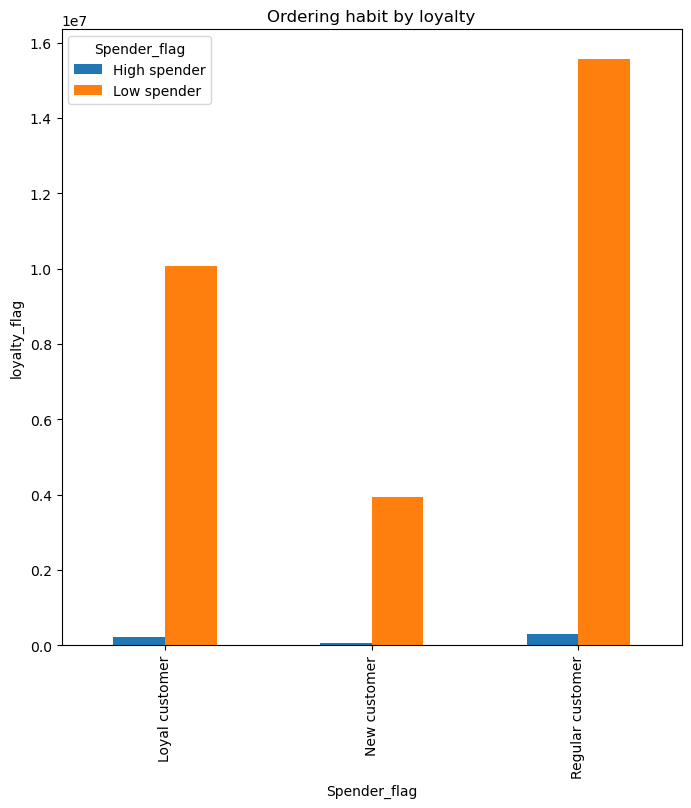

In [56]:
loyalty_spending.plot(kind='bar', figsize=(8,8))
plt.title('Ordering habit by loyalty')
plt.xlabel('Spender_flag')
plt.ylabel('loyalty_flag')
plt.savefig(os.path.join(path, 'Analysis', 'viz', 'loyalty_spending.png'))

This visualization highlights that the majority of customers across all loyalty levels are low spenders, with regular customers being the most numerous. It suggests potential opportunities for converting low spenders to high spenders, especially among loyal and regular customers.

In [58]:
# Creating crosstab for order frquency and region

In [59]:
ordering_frequency_region = pd.crosstab(df_merged['region'], df_merged['Frequency_flag'], dropna = False)

In [60]:
ordering_frequency_region

Frequency_flag,Frequent customer,Non-frequent customer,Regular customer
region,,,
Midwest,4887042,596573,1586507
Northeast,3707547,429876,1186928
South,7010976,839986,2199197
West,5403958,641556,1681278


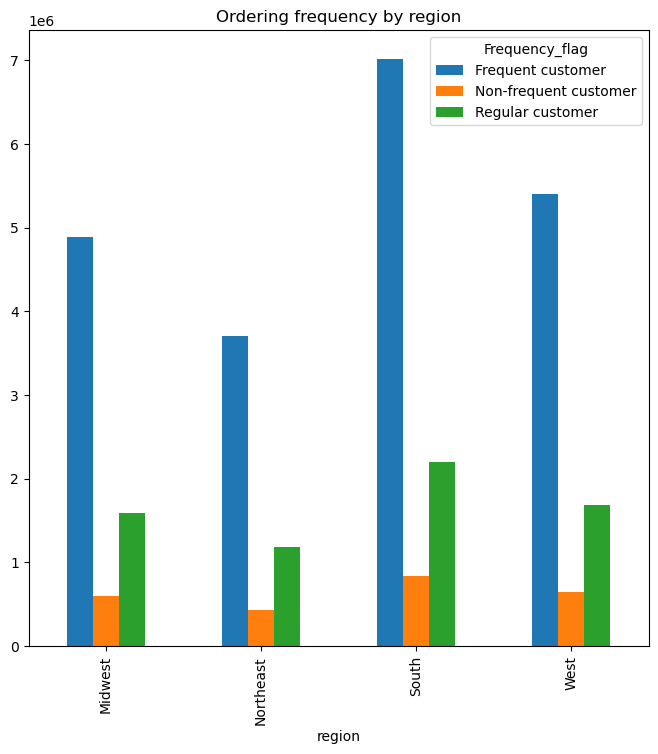

In [61]:
ordering_frequency_region.plot(kind='bar', figsize=(8,8))
plt.title('Ordering frequency by region')
plt.savefig(os.path.join(path, 'Analysis', 'viz', 'ordering_frequency_region.png'))

This visualization highlights regional differences in customer ordering habits, with the South standing out as the most active region for all customer types.

In [63]:
# create a crosstab between 'region' and 'spending_flag'

In [64]:
region_spender_flag = pd.crosstab(df_merged['region'], df_merged['Spender_flag'], dropna = False)

In [65]:
region_spender_flag

Spender_flag,High spender,Low spender
region,,
Midwest,144894,6925228
Northeast,100693,5223658
South,194352,9855807
West,147389,7579403


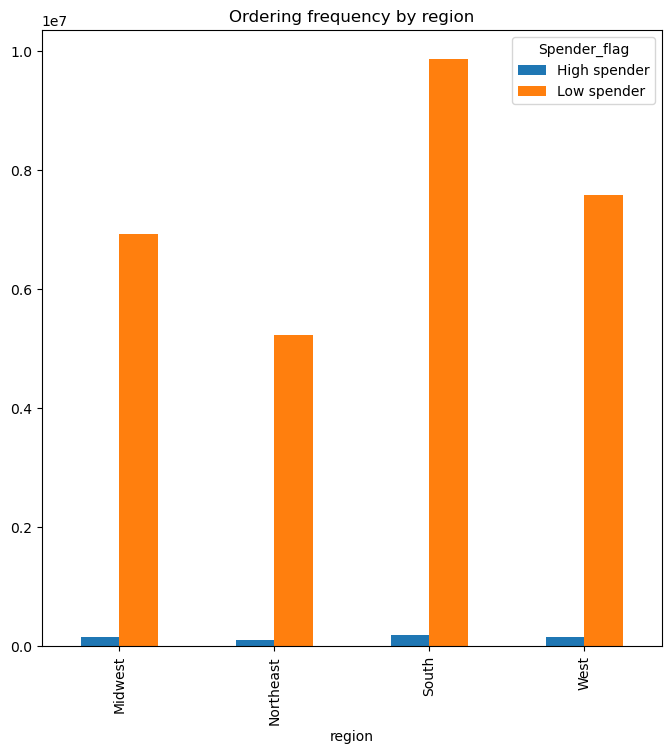

In [66]:
region_spender_flag.plot(kind='bar', figsize=(8,8))
plt.title('Ordering frequency by region')
plt.savefig(os.path.join(path, 'Analysis', 'viz', 'region_spending_flag'))

This visualization helps in understanding the distribution and frequency of orders by different spender categories in various regions, highlighting that low spenders contribute significantly more to the ordering frequency.

# Export data

In [69]:
df_merged.to_pickle(r'D:\Sonal\career foundry\CareerFoundry\Data Immersion\Achievement 4\Exc 4.10\df_merged_final.pkl')